<a href="https://colab.research.google.com/github/EdilaineProjects/COSC-110-NUMERICAL-AND-SYMBOLIC-COMPUTATION/blob/main/Lab2_titanic_Dizon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from google.colab import files

# Upload the titanic dataset
uploaded = files.upload()


Saving titanic.csv to titanic (1).csv


In [4]:
# Load the dataset into a DataFrame
df = pd.read_csv('titanic.csv')

# Display the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Understand the structure of the data
df.info()

# Summary statistics for numerical columns
df.describe()

# Display column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Count missing values in each column
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
# Fill missing values in Age with the median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Drop the Cabin column if it exists
if "Cabin" in df.columns:
    df = df.drop(columns=["Cabin"])

# Fill missing values in Embarked with the mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [8]:
# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)


Number of duplicates: 0


In [9]:
# Convert Survived and Pclass columns to categorical
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")


In [10]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()


In [11]:
# Save the cleaned dataset to a new CSV file
df.to_csv("titanic_cleaned.csv", index=False)


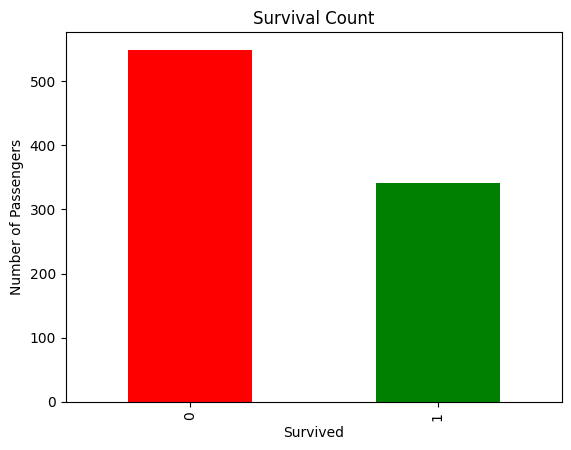

In [12]:
# Bar plot of survival counts
df["survived"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()


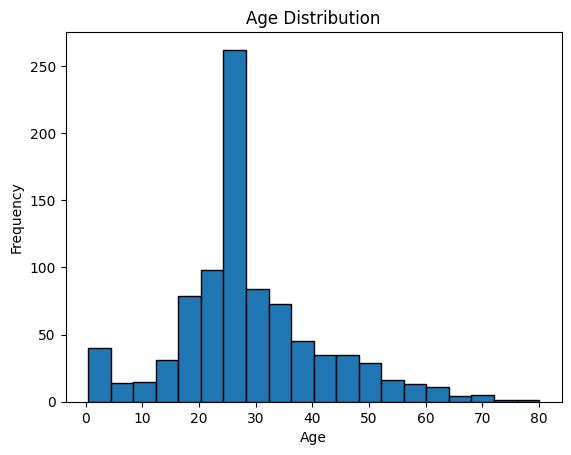

In [13]:
# Histogram of age distribution
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


In [17]:
df["survived"] = df["survived"].astype(int)


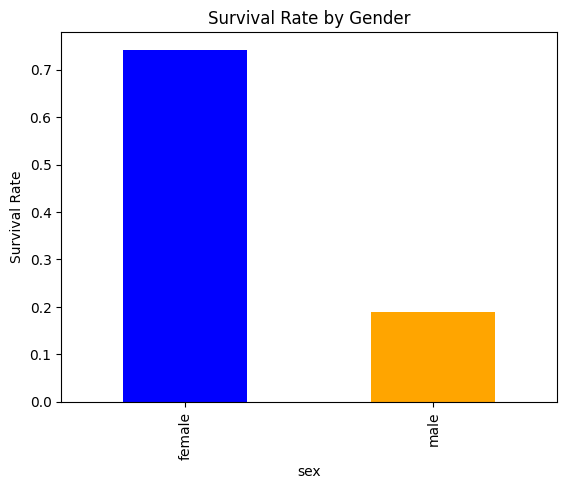

In [18]:
# Bar plot of survival rate by gender
df.groupby("sex")["survived"].mean().plot(kind="bar", color=["blue", "orange"])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


# What are your steps in cleaning the dataset?


1.   Load the Dataset:
Used the pandas.read_csv function to load the Titanic dataset into a DataFrame.

Inspect the Data:

Used .info() to check for column data types and null values.

Used .describe() to observe statistical summaries.

2. Check for Missing Values:

Ran df.isnull().sum() to identify columns with missing values.
3. Handle Missing Values:

Age: Filled missing values with the median using .fillna() because the median represents a reasonable estimate for numerical data like age.

Cabin: Dropped the column entirely using .drop() since it had too many missing values and wasn't essential for our analysis.

Embarked: Filled missing values with the mode (most frequent value) since it's categorical and the mode represents the most likely value.

4. Remove Duplicates:

Used .duplicated() to identify duplicate rows, and .drop_duplicates() to remove them for a cleaner dataset.

5. Fix Data Types:

Converted the Survived and Pclass columns to categorical using .astype("category") to better represent their categorical nature.

6. Standardize Column Names:

Used .columns.str.lower() to convert all column names to lowercase for consistency.

7. Save the Cleaned Dataset:

Saved the cleaned dataset as a new file (titanic_cleaned.csv) using .to_csv() for future analysis.

# Why These Algorithms?

Filling Missing Values: The median and mode were chosen as they provide robust and reasonable approximations without introducing extreme bias.

Dropping Columns: Cabin had too many missing values to justify imputation and was less relevant to the analysis.

Changing Data Types: This ensures the data is easier to work with for grouping, analysis, and visualization.

Standardizing Column Names: Helps avoid case sensitivity issues during analysis.

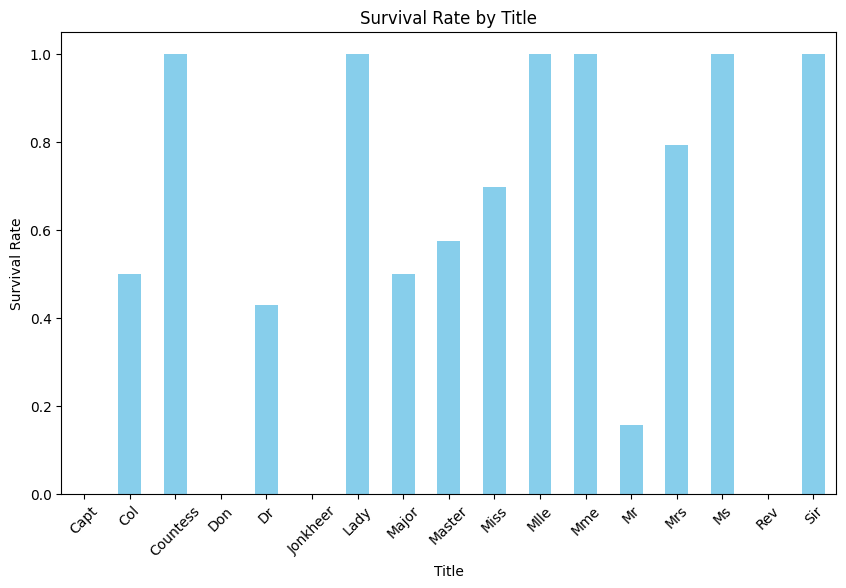

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [19]:
# Extract titles from the Name column
df["title"] = df["name"].str.extract(" ([A-Za-z]+)\.", expand=False)

# Bar plot of survival rate by title
df.groupby("title")["survived"].mean().plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Survival Rate by Title")
plt.xlabel("Title")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()

# Display unique titles
print(df["title"].value_counts())


# Analysis 1: Survival Rate by Titles in Names
Passengers with titles like "Master" and "Mrs" had higher survival rates, indicating that children and married women were more likely to survive.

Titles such as "Mr" had lower survival rates, likely reflecting that adult males were less prioritized during evacuation.

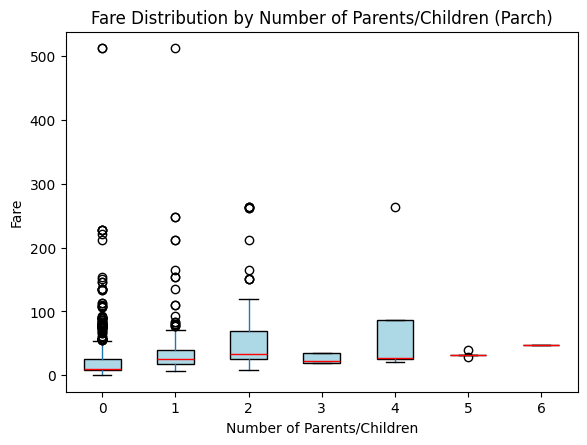

In [20]:
# Box plot of fare distribution by Parch
df.boxplot(column="fare", by="parch", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))
plt.title("Fare Distribution by Number of Parents/Children (Parch)")
plt.suptitle("")  # Remove default pandas title
plt.xlabel("Number of Parents/Children")
plt.ylabel("Fare")
plt.show()


# Analysis 2: Fare Paid by Parch Group

Passengers traveling alone (Parch = 0) paid a wider range of fares, potentially reflecting both Third-Class passengers paying low fares and First-Class passengers paying very high fares.

Passengers traveling with small families (Parch = 1-2) paid moderate fares, likely indicating group discounts or family-oriented accommodations.